In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/fashion.csv')
data = df.iloc[:, 1:].values.astype(np.float32)
target = df['label'].values

In [4]:
data_s = StandardScaler().fit_transform(data)
data_n = Normalizer().fit_transform(data_s)

In [5]:
embedding = TSNE(n_components = 2).fit_transform(data_n)

In [6]:
reducted = pd.DataFrame(embedding, columns=('x', 'y'))
reducted["class"] = target

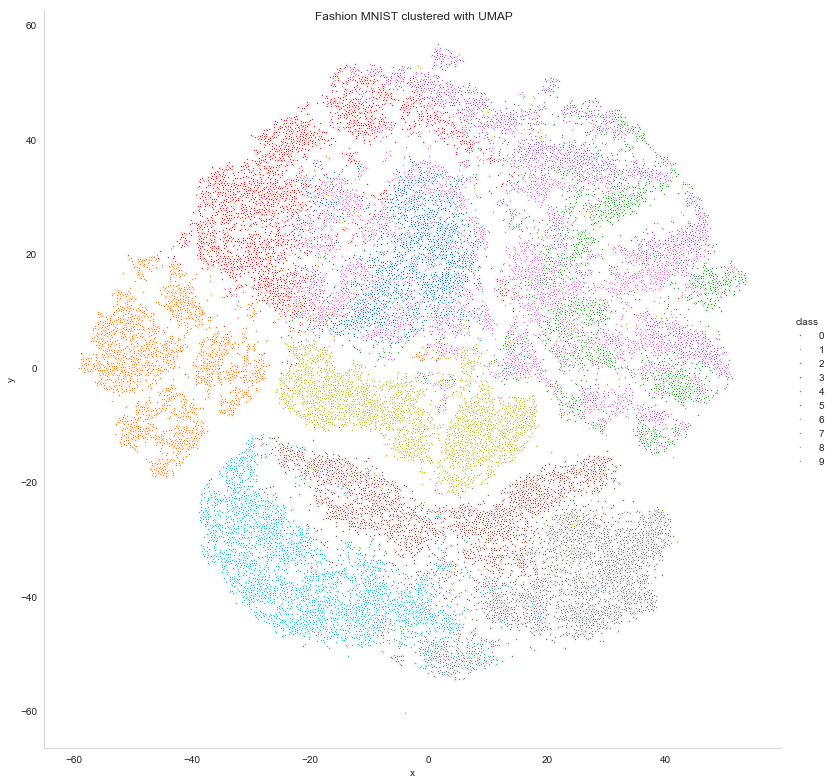

In [7]:
sns.set_style("whitegrid", {'axes.grid' : False})
#adjusting plot dots with plot_kws
ax = sns.pairplot(x_vars = ["x"], y_vars = ["y"],data = reducted, 
             hue = "class",height=11, plot_kws={"s": 4});
ax.fig.suptitle('Fashion MNIST clustered with UMAP') ;